In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dronehover.optimization import Hover
from dronehover.bodies.standard_bodies import Quadcopter
from simevo.phenotype import Phenotype

plt.style.use("../custom.mplstyle")

In [2]:
# Load log files

load_path = "./Logs/"
num_gen = 2000

In [3]:
# Load standard quadcopter for comparison
quadcopter = Quadcopter(0.110)
sim = Hover(quadcopter)
sim.compute_hover(verbose=False)
quad_alpha = sim.alpha
quad_ctrl = min(sim.eig_m)
quad_size = 0.220*np.sin(np.pi/4) * 0.220*np.sin(np.pi/4)

In [4]:
# Load data
objectives = pd.read_csv(os.path.join(load_path, "objectives", f"objectives{num_gen}.csv"))
drones = np.load(os.path.join(load_path, "population", f"population{num_gen}.npy"))
drones = drones.tolist()

objectives['drone'] = drones

objectives_optim = objectives[objectives["rank"]==1]

alpha = objectives[objectives["rank"]!=1]["alpha"]
size = objectives[objectives["rank"]!=1]["size"]
size = size

ctrl = objectives[objectives["rank"]!=1]["ctrl"]
ctrl = ctrl

optim_4 = objectives_optim[objectives_optim["num_props"]==4]
optim_5 = objectives_optim[objectives_optim["num_props"]==5]
optim_6 = objectives_optim[objectives_optim["num_props"]==6]
optim_7 = objectives_optim[objectives_optim["num_props"]==7]
optim_8 = objectives_optim[objectives_optim["num_props"]==8]


alpha_optim = objectives_optim["alpha"]
size_optim = objectives_optim["size"]
ctrl_optim = objectives_optim["ctrl"]

print(max(ctrl_optim))

190402.60832935703


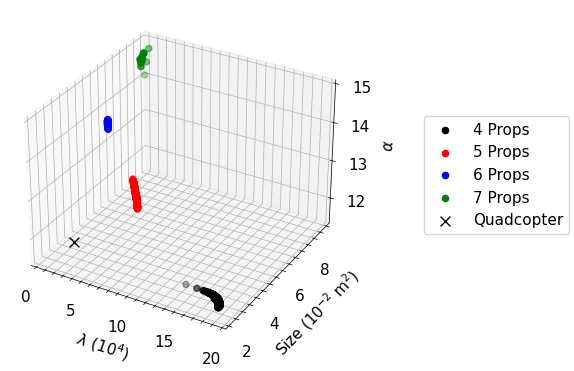

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(optim_4["ctrl"]*1e-4, optim_4["size"]*1e2, optim_4["alpha"], color='k', s=20)
ax.scatter(optim_5["ctrl"]*1e-4, optim_5["size"]*1e2, optim_5["alpha"], color='r', s=20)
ax.scatter(optim_6["ctrl"]*1e-4, optim_6["size"]*1e2, optim_6["alpha"], color='b', s=20)
ax.scatter(optim_7["ctrl"]*1e-4, optim_7["size"]*1e2, optim_7["alpha"], color='g', s=20)
ax.scatter(quad_ctrl*1e-4, quad_size*1e2, quad_alpha, color='k', marker="x", s=50)

ax.set_xlabel(r"$\lambda$ ($10^4$)")
ax.set_ylabel(r"Size ($10^{-2}$ m$^2$)")
ax.set_zlabel(r"$\alpha$")

ax.scatter([], [], [], color="k", label="4 Props", s=20)
ax.scatter([], [], [], color="r", label="5 Props", s=20)
ax.scatter([], [], [], color="b", label="6 Props", s=20)
ax.scatter([], [], [], color="g", label="7 Props", s=20)
ax.scatter([], [], [], color="k", label="Quadcopter", marker="x", s=50)
plt.legend(loc="best", bbox_to_anchor=(1.65, 0.7))

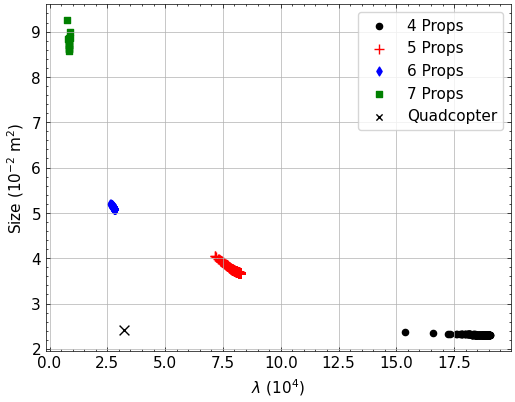

In [6]:
# Plot the controllability vs Size

plt.scatter(optim_4["ctrl"]*1e-4, optim_4["size"]*1e2, color='k', s=20)
plt.scatter(optim_5["ctrl"]*1e-4, optim_5["size"]*1e2, color='r', marker="+", s=50)
plt.scatter(optim_6["ctrl"]*1e-4, optim_6["size"]*1e2, color='b', marker="d", s=20)
plt.scatter(optim_7["ctrl"]*1e-4, optim_7["size"]*1e2, color='g', marker="s", s=20)
plt.scatter(quad_ctrl*1e-4, quad_size*1e2, color="k", marker="x", s=50)

plt.xlabel(r"$\lambda$ ($10^4$)")
plt.ylabel(r"Size ($10^{-2}$ m$^2$)")

plt.scatter([], [], color="k", label="4 Props", s=20)
plt.scatter([], [], color="r", marker='+', label="5 Props", s=50)
plt.scatter([], [], color="b", marker="d", label="6 Props", s=20)
plt.scatter([], [], color="green", marker="s", label="7 Props", s=20)
plt.scatter([], [], color="k", label="Quadcopter", marker="x", s=20)
plt.legend(loc="best")
# plt.savefig("fullsampled-ctrl-size.eps", format='eps')

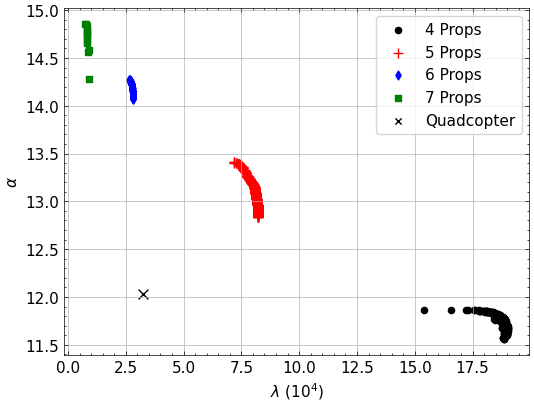

In [7]:
# Plot Controllability vs Alpha
plt.scatter(optim_4["ctrl"]*1e-4, optim_4["alpha"], color='k', s=20)
plt.scatter(optim_5["ctrl"]*1e-4, optim_5["alpha"], color='r', marker='+', s=50)
plt.scatter(optim_6["ctrl"]*1e-4, optim_6["alpha"], color='b', marker="d", s=20)
plt.scatter(optim_7["ctrl"]*1e-4, optim_7["alpha"], color='green', marker='s', s=20)
plt.scatter(quad_ctrl*1e-4, quad_alpha, color='k', marker="x", s=50)
plt.xlabel(r"$\lambda$ ($10^4$)")
plt.ylabel(r"$\alpha$")

plt.scatter([], [], color="k", label="4 Props", s=20)
plt.scatter([], [], color="r", marker='+', label="5 Props", s=50)
plt.scatter([], [], color="b", marker="d", label="6 Props", s=20)
plt.scatter([], [], color="green", marker="s", label="7 Props", s=20)
plt.scatter([], [], color="k", label="Quadcopter", marker="x", s=20)
plt.legend(loc="best")

# plt.savefig("fullsampled-ctrl-alpha.eps", format='eps')

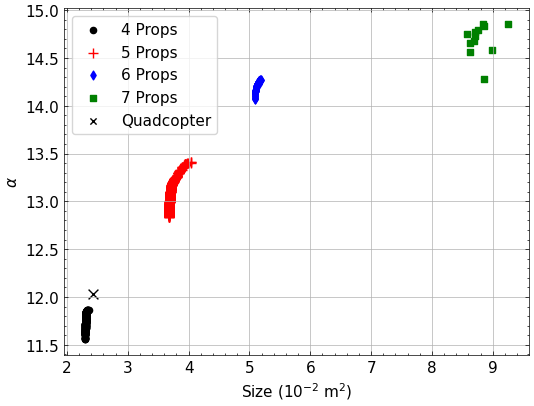

In [8]:
# Plot Size vs Alpha

plt.scatter(optim_4["size"]*1e2, optim_4["alpha"], color='k', s=20)
plt.scatter(optim_5["size"]*1e2, optim_5["alpha"], color='r', marker="+", s=50)
plt.scatter(optim_6["size"]*1e2, optim_6["alpha"], color='b', marker="d", s=20)
plt.scatter(optim_7["size"]*1e2, optim_7["alpha"], color='green', marker="s", s=20)
plt.scatter(quad_size*1e2, quad_alpha, color='k', marker="x", s=50)

plt.xlabel(r"Size ($10^{-2}$ m$^2$)")
plt.ylabel(r"$\alpha$")

plt.scatter([], [], color="k", label="4 Props", s=20)
plt.scatter([], [], color="r", marker='+', label="5 Props", s=50)
plt.scatter([], [], color="b", marker="d", label="6 Props", s=20)
plt.scatter([], [], color="green", marker="s", label="7 Props", s=20)
plt.scatter([], [], color="k", label="Quadcopter", marker="x", s=20)
plt.legend(loc="best")
# plt.savefig("fullsampled-size-alpha.eps", format='eps')

7562.836769951251


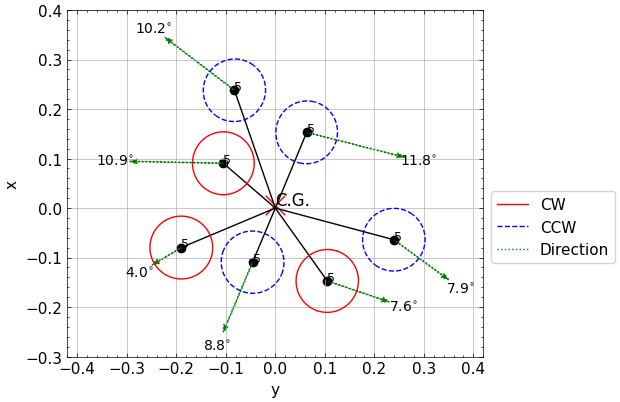

In [9]:
# Plot max alpha drone
alpha_max = objectives_optim.iloc[objectives_optim['alpha'].idxmax()]["drone"]
alpha_drone = Phenotype(alpha_max)
alpha_drone.plot_drone(quiver=True, legend=True)
plt.xlim([-0.42, 0.42])
plt.ylim([-0.3, 0.4])

print(objectives_optim.iloc[objectives_optim['alpha'].idxmax()]["ctrl"])
# plt.savefig("alpha-drone.eps", format='eps')


In [10]:
for prop in alpha_drone.props:
    prop_loc = np.asarray(prop["loc"])
    print(prop_loc)

[-0.14719539  0.10496335  0.        ]
[-0.10921786 -0.0458722   0.        ]
[0.15300866 0.06337066 0.        ]
[ 0.09055821 -0.10494951  0.        ]
[-0.07972269 -0.18988273  0.        ]
[-0.06387142  0.23947395  0.        ]
[ 0.23802094 -0.08257838  0.        ]


In [11]:
for prop in alpha_drone.props:
    prop_loc = np.asarray(prop["loc"])
    prop_length = np.linalg.norm(prop_loc)
    prop_angle = np.arctan2(prop_loc[1],prop_loc[0]) / np.pi * 180
    print(f"length: {prop_length}")
    print(f"angle: {prop_angle}")

    prop_dir = prop["dir"][0:4]
    print(f"inclination: {np.arccos(-prop_dir[2])/np.pi*180}")
    print(f"azimuth: {np.arctan2(prop_dir[1],prop_dir[0])/np.pi*180 - prop_angle}")
    print(prop_dir[-1])
    print(" ")

length: 0.18078657888844188
angle: 144.5077661697236
inclination: 7.588132582278198
azimuth: -35.82012485051864
cw
 
length: 0.118460116328984
angle: -157.2172834564288
inclination: 8.849976508827144
azimuth: 0.0007707094175088969
ccw
 
length: 0.1656124681979198
angle: 22.497570867488193
inclination: 11.75763825525982
azimuth: 81.76176464108892
ccw
 
length: 0.1386188625480371
angle: -49.209943317117364
inclination: 10.929368693500265
azimuth: -39.632394193875626
cw
 
length: 0.20593969944221752
angle: -112.77520759003968
inclination: 3.9526423155673776
azimuth: -8.260207339815864
cw
 
length: 0.24784537740977658
angle: 104.9340310038034
inclination: 7.8931443142405255
azimuth: 21.251716459280573
ccw
 
length: 0.2519387952301817
angle: -19.1335757667935
inclination: 10.171335055701896
azimuth: -33.62971398825289
ccw
 


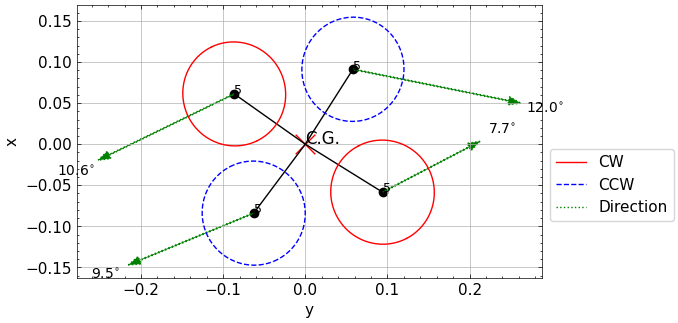

In [12]:
# Plot min size drone
size_min = objectives_optim.iloc[objectives_optim['size'].idxmin()]["drone"]
vol_drone = Phenotype(size_min)
vol_drone.plot_drone(quiver=True)
# plt.savefig("size-drone.eps", format='eps')

In [13]:
for prop in vol_drone.props:
    prop_loc = np.asarray(prop["loc"])
    prop_length = np.linalg.norm(prop_loc)
    prop_angle = np.arctan2(prop_loc[1],prop_loc[0]) / np.pi * 180
    print(f"length: {prop_length}")
    print(f"angle: {prop_angle}")

    prop_dir = prop["dir"][0:3]
    print(f"inclination: {np.arccos(-prop_dir[2])/np.pi*180}")
    print(f"azimuth: {np.arctan2(prop_dir[1],prop_dir[0])/np.pi*180 - prop_angle}")
    print(" ")

length: 0.11071293998434238
angle: 121.86153740533504
inclination: 7.696640243520118
azimuth: -59.40520668940795
 
length: 0.10485183177915845
angle: -143.21286273441115
inclination: 9.511255327560285
azimuth: 30.757579535909514
 
length: 0.1080361741571842
angle: 32.47248799548191
inclination: 12.032738068495668
azimuth: 68.93824833300802
 
length: 0.10593763840873512
angle: -54.73178801436414
inclination: 10.627564754659776
azimuth: -61.24389523582707
 


(-0.18, 0.2)

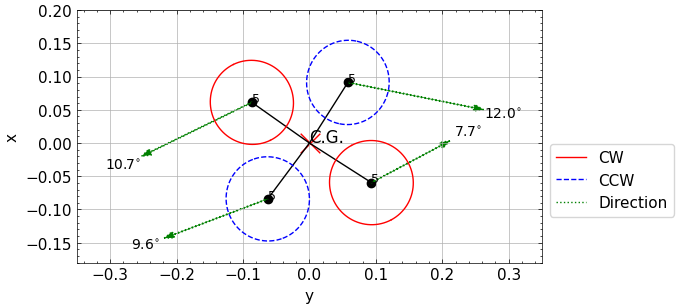

In [14]:
# Plot max ctrl drone
ctrl_max = objectives_optim.iloc[objectives_optim['ctrl'].idxmax()]["drone"]
ctrl_drone = Phenotype(ctrl_max)
ctrl_drone.plot_drone(quiver=True)
plt.xlim([-0.35, 0.35])
plt.ylim([-0.18, 0.2])
# plt.savefig("ctrl-drone.eps", format='eps')

In [16]:
for prop in ctrl_drone.props:
    prop_loc = np.asarray(prop["loc"])
    print(prop_loc)

[-0.05961852  0.09331001  0.        ]
[-0.08409903 -0.06269724  0.        ]
[0.09120509 0.05791518 0.        ]
[ 0.06118462 -0.08661747  0.        ]


In [17]:
for prop in ctrl_drone.props:
    prop_loc = np.asarray(prop["loc"])
    prop_length = np.linalg.norm(prop_loc)
    prop_angle = np.arctan2(prop_loc[1],prop_loc[0]) / np.pi * 180
    print(f"length: {prop_length}")
    print(f"angle: {prop_angle}")

    prop_dir = prop["dir"][0:4]
    print(f"inclination: {np.arccos(-prop_dir[2])/np.pi*180}")
    print(f"azimuth: {np.arctan2(prop_dir[1],prop_dir[0])/np.pi*180 - prop_angle}")
    print(prop_dir[-1])
    print(" ")

length: 0.11072996826637284
angle: 122.57571122299777
inclination: 7.695666884686719
azimuth: -60.62605761855283
cw
 
length: 0.10489800151770046
angle: -143.2948486917721
inclination: 9.607759935255604
azimuth: 32.52080036241996
ccw
 
length: 0.10803951715375748
angle: 32.41552227033686
inclination: 12.038586149730314
azimuth: 68.94379818673585
ccw
 
length: 0.10604783647346688
angle: -54.76348401535952
inclination: 10.65388333584677
azimuth: -61.28576135309426
cw
 
